In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "../data/preprocessed")
VISUALS_DIR = os.path.join(BASE_DIR, "..", "visuals")

# Load datasets

dayahead_file = os.path.join(DATA_DIR, "preprocessed_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv")
df_dayahead = pd.read_csv(dayahead_file, delimiter=",", low_memory=False)

price_file = "../data/preprocessed/preprocessed_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
consumption_file = "../data/preprocessed/preprocessed_cleaned_Actual_consumption_202301010000_202503050000_Quarterhour.csv"

df_price = pd.read_csv(price_file, delimiter=",", low_memory=False)
df_consumption = pd.read_csv(consumption_file, delimiter=",", low_memory=False)

generation_file = "../data/preprocessed/preprocessed_cleaned_Actual_generation_202301010000_202503050000_Quarterhour.csv"
df_generation = pd.read_csv(generation_file, delimiter=",", low_memory=False)

cross_border_file = "../data/preprocessed/preprocessed_cleaned_Cross-border_physical_flows_202301010000_202503050000_Quarterhour.csv"
df_cross_border = pd.read_csv(cross_border_file, delimiter=",", low_memory=False)

forecast_gen_file = "../data/preprocessed/preprocessed_cleaned_Forecasted_generation_Day-Ahead_202301010000_202503050000_Hour_Quarterhour.csv"
df_forecast = pd.read_csv(forecast_gen_file, delimiter=",", low_memory=False)

balancing_reserves_file = "../data/preprocessed/preprocessed_cleaned_Balancing_energy_202301010000_202503050000_Quarterhour_Month.csv"
tso_costs_file = "../data/preprocessed/preprocessed_cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"

df_balancing = pd.read_csv(balancing_reserves_file, delimiter=",", low_memory=False)
df_tso = pd.read_csv(tso_costs_file, delimiter=",", low_memory=False)

exchange_file = "../data/preprocessed/preprocessed_cleaned_Scheduled_commercial_exchanges_202301010000_202503050000_Quarterhour.csv"
df_exchange = pd.read_csv(exchange_file, delimiter=",", low_memory=False)


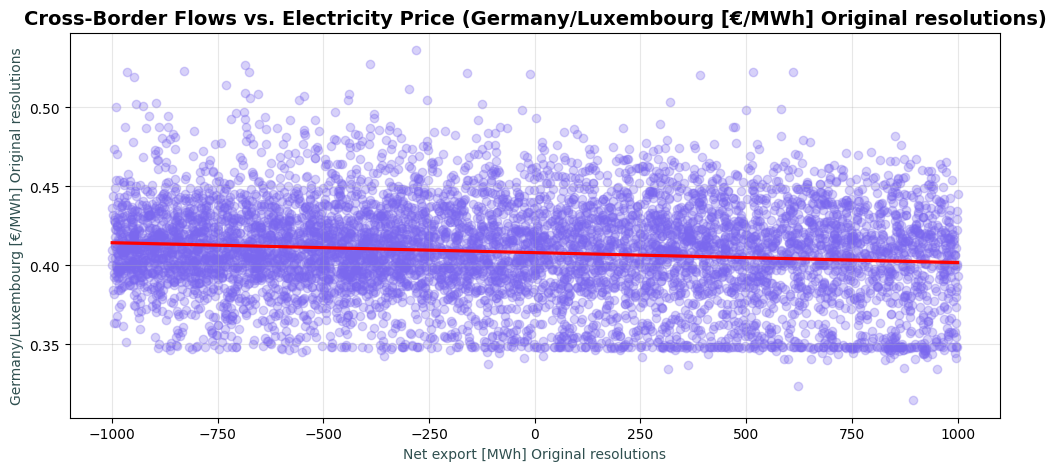

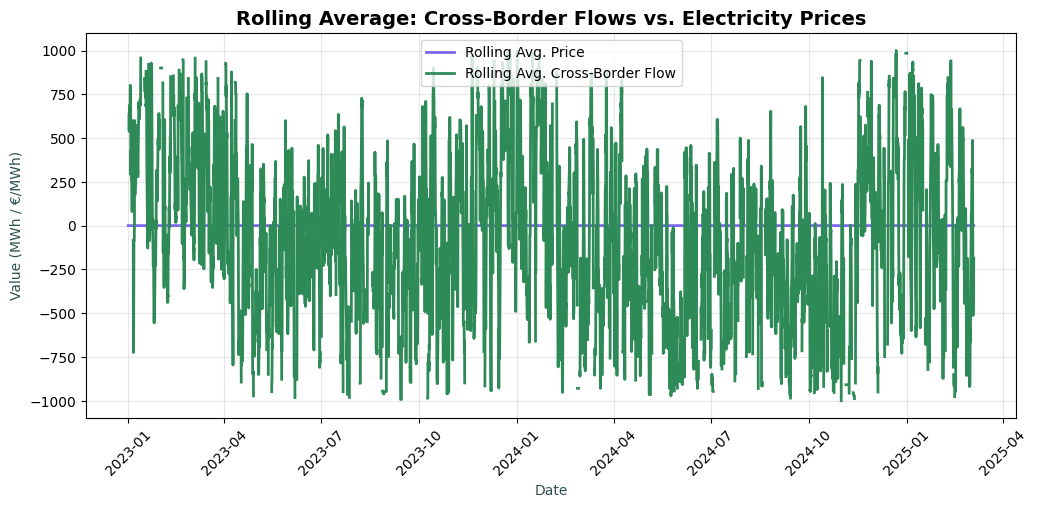

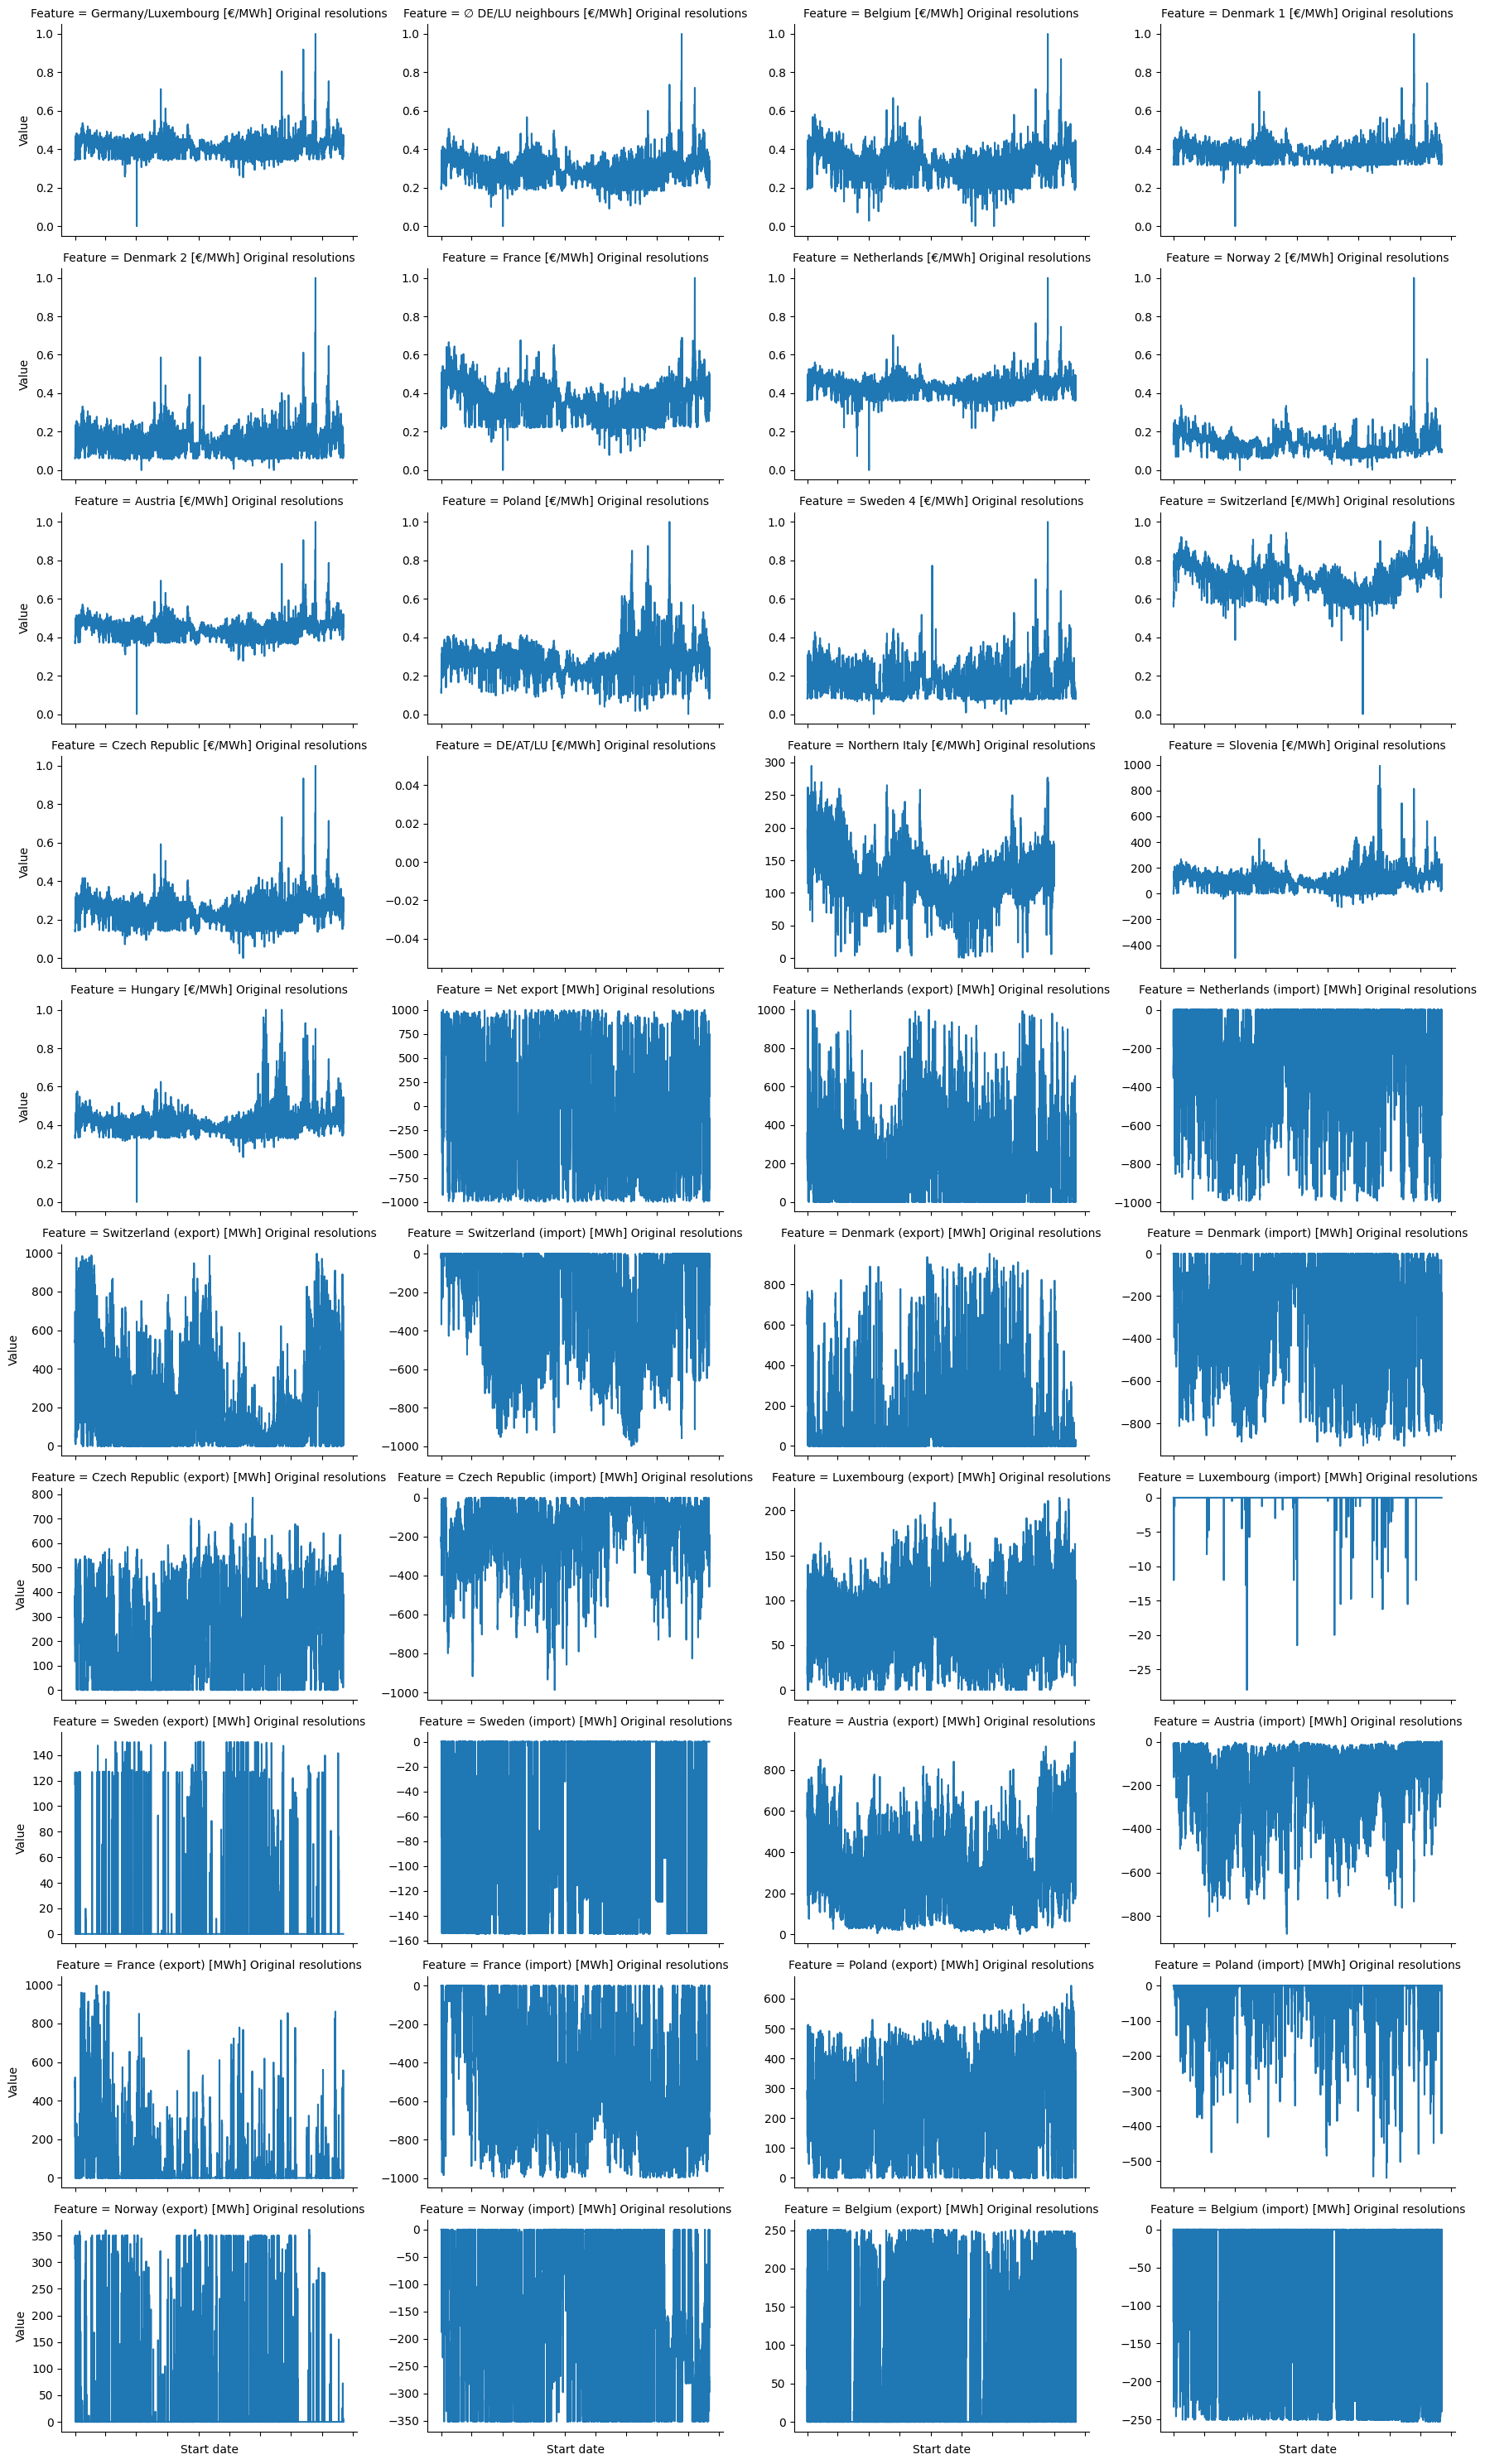

✅ Plots saved in '../plots' directory.


In [4]:
### --- Cross-border flows vs price --- ###

# Convert time column to datetime
df_cross_border["Start date"] = pd.to_datetime(df_cross_border["Start date"], errors="coerce")
df_price["Start date"] = pd.to_datetime(df_price["Start date"], errors="coerce")

# Merge datasets on "Start date"
df_merged = df_price.merge(df_cross_border, on="Start date", how="inner")

# Select price and flow columns
price_columns = [col for col in df_price.columns if "€/MWh" in col]
flow_columns = [col for col in df_cross_border.columns if "[MWh]" in col]

# Convert columns to numeric
df_merged[price_columns] = df_merged[price_columns].apply(pd.to_numeric, errors="coerce")
df_merged[flow_columns] = df_merged[flow_columns].apply(pd.to_numeric, errors="coerce")

# Select a sample country for detailed analysis
country_price = price_columns[0]
flow_column = flow_columns[0]

# 📌 **1️⃣ Scatter Plot with Regression Line**
plt.figure(figsize=(12, 5))
sns.regplot(
    x=df_merged[flow_column], 
    y=df_merged[country_price], 
    scatter_kws={"alpha": 0.3, "color": "#7B68EE"},  # Deep Sky Blue for points
    line_kws={"color": "red"}  # Red regression line
)
plt.xlabel(flow_column, color="#2F4F4F")
plt.ylabel(country_price, color="#2F4F4F")
plt.title(f"Cross-Border Flows vs. Electricity Price ({country_price})", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.savefig(os.path.join(VISUALS_DIR, "cross_border_flows_vs_price_scatter.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 📌 **2️⃣ Rolling Average Trends (Time Series)**
df_merged["Rolling_Price"] = df_merged[country_price].rolling(window=24, min_periods=1).mean()
df_merged["Rolling_Flow"] = df_merged[flow_column].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(12, 5))
plt.plot(df_merged["Start date"], df_merged["Rolling_Price"], label="Rolling Avg. Price", color="#7B68EE", linewidth=2)
plt.plot(df_merged["Start date"], df_merged["Rolling_Flow"], label="Rolling Avg. Cross-Border Flow", color="#2E8B57", linewidth=2)

plt.xlabel("Date", color="#2F4F4F")
plt.ylabel("Value (MWh / €/MWh)", color="#2F4F4F")
plt.title("Rolling Average: Cross-Border Flows vs. Electricity Prices", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.savefig(os.path.join(VISUALS_DIR, "cross_border_flows_vs_price_trend.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 📌 **3️⃣ Country-Wise Facet Grid**
melted_df = df_merged.melt(id_vars=["Start date"], value_vars=price_columns + flow_columns, var_name="Feature", value_name="Value")

g = sns.FacetGrid(melted_df, col="Feature", col_wrap=4, sharex=True, sharey=False, height=3, aspect=1.5, palette="coolwarm")
g.map_dataframe(sns.lineplot, x="Start date", y="Value")
g.set_xticklabels(rotation=45)
plt.savefig(os.path.join(VISUALS_DIR, "cross_border_flows_vs_price_facetgrid.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("✅ Plots saved in '../plots' directory.")


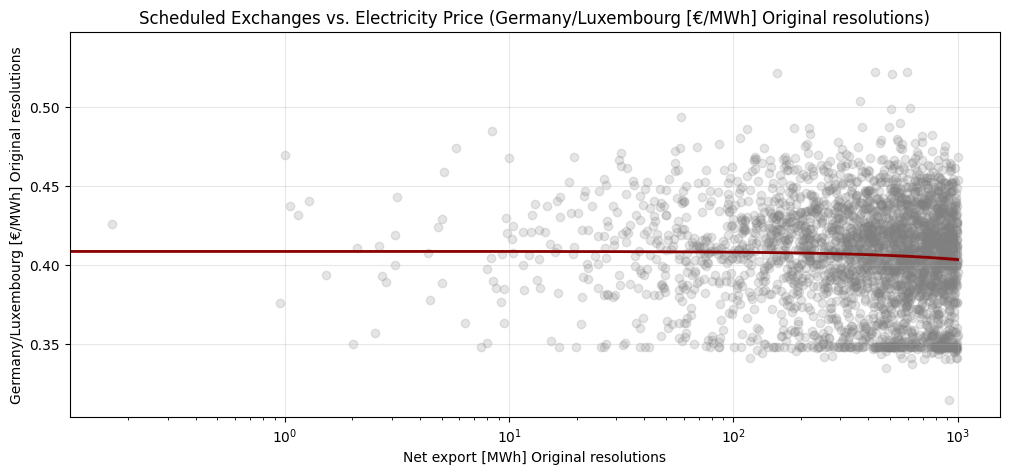

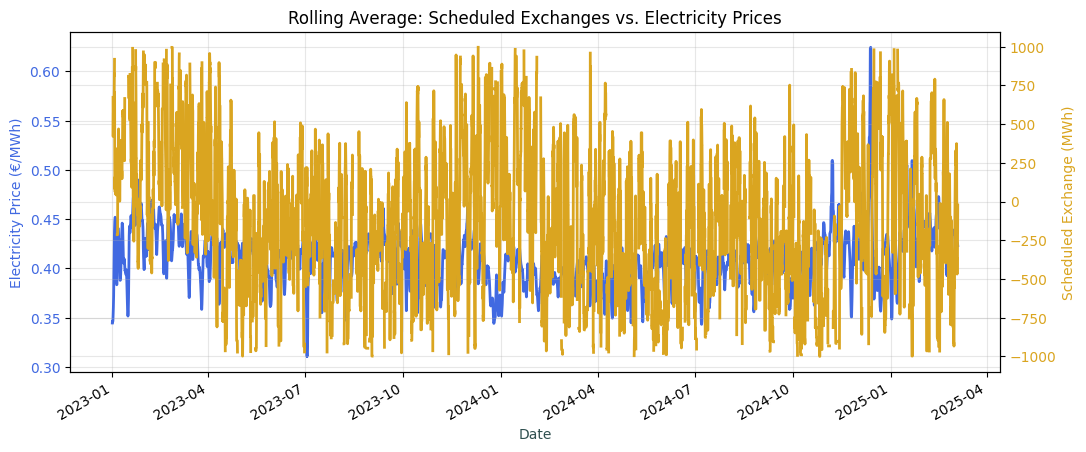

KeyboardInterrupt: 

In [ ]:
### --- Scheduled Exchanges vs. Electricity Price --- ###

# Convert time column to datetime
df_exchange["Start date"] = pd.to_datetime(df_exchange["Start date"], errors="coerce")
df_price["Start date"] = pd.to_datetime(df_price["Start date"], errors="coerce")

# Merge datasets on Start date
df_merged = df_price.merge(df_exchange, on="Start date", how="inner")

# Select price and exchange columns
price_columns = [col for col in df_price.columns if "€/MWh" in col]
exchange_columns = [col for col in df_exchange.columns if "[MWh]" in col]

# Convert columns to numeric
df_merged[price_columns] = df_merged[price_columns].apply(pd.to_numeric, errors="coerce")
df_merged[exchange_columns] = df_merged[exchange_columns].apply(pd.to_numeric, errors="coerce")

# Select a sample country for detailed analysis
country_price = price_columns[0]  
exchange_flow = exchange_columns[0] 

# 📌 **1️⃣ Scatter Plot with Regression Line**
plt.figure(figsize=(12, 5))
sns.regplot(
    x=df_merged[exchange_flow], 
    y=df_merged[country_price], 
    scatter_kws={"alpha": 0.2, "color": "gray"},  # Adjusted opacity
    line_kws={"color": "darkred", "linewidth": 2}  # Darker regression line
)
plt.xlabel(exchange_flow)
plt.ylabel(country_price)
plt.title(f"Scheduled Exchanges vs. Electricity Price ({country_price})")
plt.grid(alpha=0.3)
plt.xscale("log")
plt.savefig(os.path.join(VISUALS_DIR, "scheduled_exchanges_vs_price_scatter.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 📌 **2️⃣ Rolling Average Trends (Time Series)**
df_merged["Rolling_Price"] = df_merged[country_price].rolling(window=24, min_periods=1).mean()
df_merged["Rolling_Exchange"] = df_merged[exchange_flow].rolling(window=24, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary y-axis (Electricity Price)
ax1.plot(df_merged["Start date"], df_merged["Rolling_Price"], label="Rolling Avg. Price", color="#4169E1", linewidth=2)
ax1.set_xlabel("Date", color="#2F4F4F")  # Dark Slate Gray for x-axis
ax1.set_ylabel("Electricity Price (€/MWh)", color="#4169E1")
ax1.tick_params(axis="y", labelcolor="#4169E1")

# Secondary y-axis (Scheduled Exchange)
ax2 = ax1.twinx()
ax2.plot(df_merged["Start date"], df_merged["Rolling_Exchange"], label="Rolling Avg. Exchange", color="#DAA520", linewidth=2)
ax2.set_ylabel("Scheduled Exchange (MWh)", color="#DAA520")
ax2.tick_params(axis="y", labelcolor="#DAA520")

# Add grid with light opacity
ax1.grid(alpha=0.3)

plt.title("Rolling Average: Scheduled Exchanges vs. Electricity Prices")
fig.autofmt_xdate()
plt.grid(alpha=0.3)
plt.savefig(os.path.join(VISUALS_DIR, "scheduled_exchanges_vs_price_trend.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 📌 **3️⃣ Country-Wise Facet Grid**
melted_df = df_merged.melt(id_vars=["Start date"], value_vars=price_columns + exchange_columns, var_name="Feature", value_name="Value")

# Sorting for better feature alignment
melted_df["Feature"] = pd.Categorical(melted_df["Feature"], categories=sorted(melted_df["Feature"].unique()), ordered=True)

g = sns.FacetGrid(melted_df, col="Feature", col_wrap=4, sharex=True, sharey=False, height=3.5, aspect=1.8)
g.map_dataframe(sns.lineplot, x="Start date", y="Value")

for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)

plt.savefig(os.path.join(VISUALS_DIR, "scheduled_exchanges_vs_price_facetgrid.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("✅ Visuals saved in '../visuals' directory.")


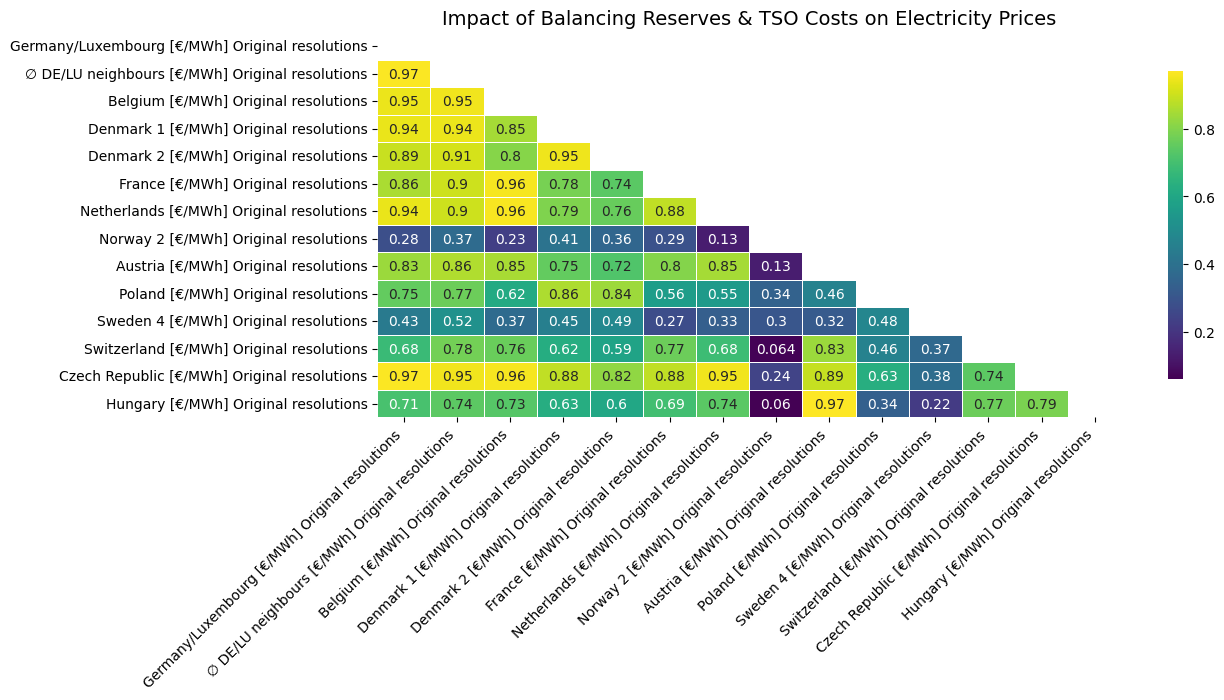

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\balancing_reserves_tso_correlation.png


In [8]:
### --- Impact of Balancing Reserves & TSO Costs on Electricity Prices --- ###

# Convert time column to datetime
df_balancing["Start date"] = pd.to_datetime(df_balancing["Start date"])
df_tso["Start date"] = pd.to_datetime(df_tso["Start date"])
df_price["Start date"] = pd.to_datetime(df_price["Start date"])

# Merge datasets on Start date
df_merged = df_price.merge(df_balancing, on="Start date", how="inner").merge(df_tso, on="Start date", how="inner")

# Sort by date for consistency
df_merged = df_merged.sort_values("Start date").set_index("Start date")

# Drop non-numeric columns before correlation
df_numeric = df_merged.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Create a mask for the upper triangle (to avoid duplicate values in heatmap)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with refined formatting
plt.figure(figsize=(12, 5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="viridis",  # Better contrast than 'coolwarm'
    fmt=".2g",       # Cleaner numeric formatting
    linewidths=0.5,  # Thin grid lines
    mask=mask,       # Show only upper triangle
    cbar_kws={"shrink": 0.8}  # Adjust colorbar size
)

plt.title("Impact of Balancing Reserves & TSO Costs on Electricity Prices", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.savefig(os.path.join(VISUALS_DIR, "balancing_reserves_tso_correlation.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'balancing_reserves_tso_correlation.png')}")


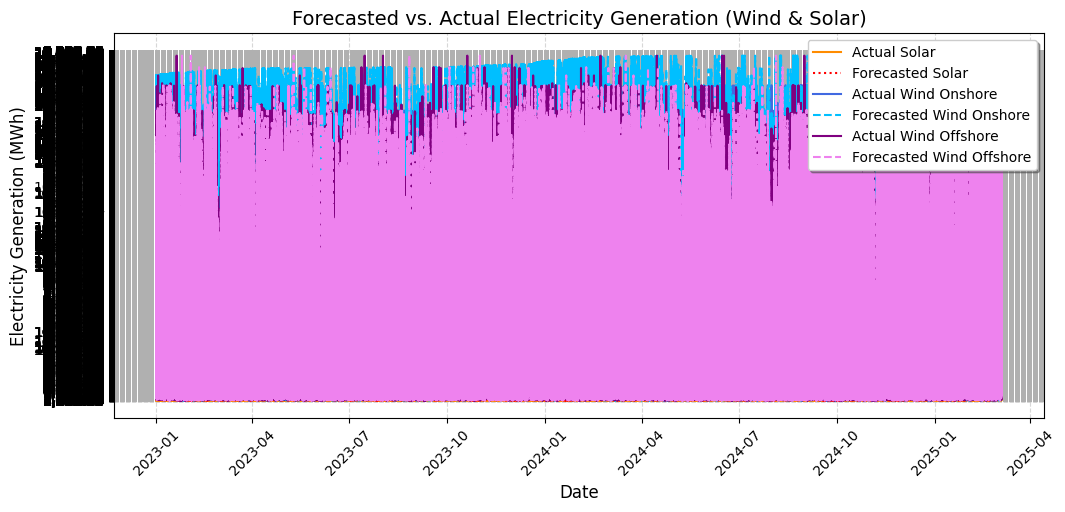

Plot saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\forecast_vs_actual_generation.png


In [2]:
### --- Plot Actual vs Forecasted Generation (Wind + Solar) --- ###

# Convert time column to datetime
df_generation["Start date"] = pd.to_datetime(df_generation["Start date"])
df_forecast["Start date"] = pd.to_datetime(df_forecast["Start date"])

# Select relevant columns
actual_columns = [
    "Start date",
    "Photovoltaics [MWh] Original resolutions",
    "Wind offshore [MWh] Original resolutions",
    "Wind onshore [MWh] Original resolutions"
]

forecast_columns = [
    "Start date",
    "Photovoltaics [MWh] Original resolutions",
    "Wind offshore [MWh] Original resolutions",
    "Wind onshore [MWh] Original resolutions",
    "Total [MWh] Original resolutions"  # Includes all generation sources
]

df_actual = df_generation[actual_columns]
df_forecast = df_forecast[forecast_columns]

# Merge datasets on Start date
df_merged = df_actual.merge(df_forecast, on="Start date", suffixes=("_actual", "_forecast"))

# Sort by date for better visualization
df_merged = df_merged.sort_values("Start date").set_index("Start date")

# Plot Actual vs Forecasted Generation (Wind + Solar)
plt.figure(figsize=(12, 5))

plt.plot(df_merged.index, df_merged["Photovoltaics [MWh] Original resolutions_actual"], label="Actual Solar", color="darkorange", linewidth=1.5)
plt.plot(df_merged.index, df_merged["Photovoltaics [MWh] Original resolutions_forecast"], label="Forecasted Solar", linestyle="dotted", color="red", linewidth=1.5)

plt.plot(df_merged.index, df_merged["Wind onshore [MWh] Original resolutions_actual"], label="Actual Wind Onshore", color="royalblue", linewidth=1.5)
plt.plot(df_merged.index, df_merged["Wind onshore [MWh] Original resolutions_forecast"], label="Forecasted Wind Onshore", linestyle="dashed", color="deepskyblue", linewidth=1.5)

plt.plot(df_merged.index, df_merged["Wind offshore [MWh] Original resolutions_actual"], label="Actual Wind Offshore", color="purple", linewidth=1.5)
plt.plot(df_merged.index, df_merged["Wind offshore [MWh] Original resolutions_forecast"], label="Forecasted Wind Offshore", linestyle="dashed", color="violet", linewidth=1.5)

plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Electricity Generation (MWh)", fontsize=12)
plt.title("Forecasted vs. Actual Electricity Generation (Wind & Solar)", fontsize=14)
plt.legend(fontsize=10, loc="upper right", shadow=True)
plt.grid(True, linestyle="--", alpha=0.5)

# Save and show the plot
plt.savefig(os.path.join(VISUALS_DIR, "forecast_vs_actual_generation.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'forecast_vs_actual_generation.png')}")

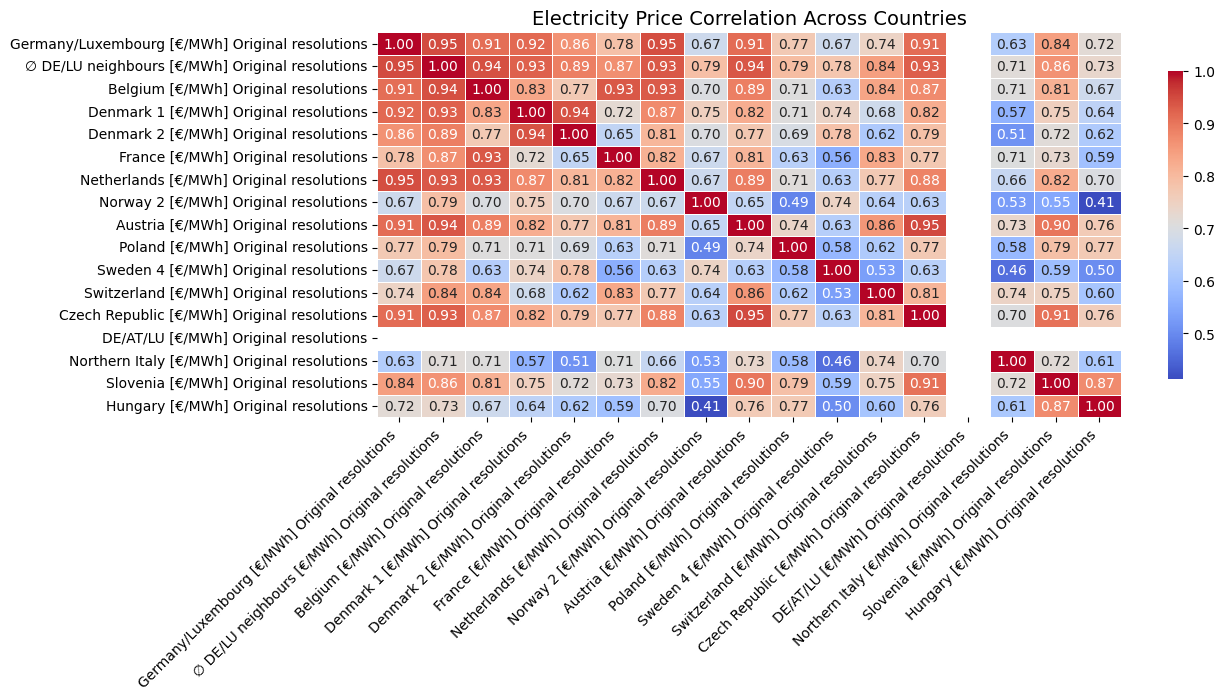

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\country_electricity_price_correlation.png


In [3]:
### --- Electricity Price Correlation Across Countries --- ###

# Convert time column to datetime
df_dayahead["Start date"] = pd.to_datetime(df_dayahead["Start date"], errors="coerce")

# Select electricity price columns (ensuring no unwanted columns)
price_columns = [col for col in df_dayahead.columns if "€/MWh" in col and "Original resolutions" in col]

# Convert price columns to numeric, forcing errors to NaN
df_dayahead[price_columns] = df_dayahead[price_columns].apply(pd.to_numeric, errors="coerce")

# Drop rows where all price values are NaN
df_dayahead.dropna(subset=price_columns, how="all", inplace=True)

# Compute correlation matrix
corr_matrix = df_dayahead[price_columns].corr()

# Plot heatmap with refinements
plt.figure(figsize=(12, 5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Electricity Price Correlation Across Countries", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(os.path.join(VISUALS_DIR, "country_electricity_price_correlation.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'country_electricity_price_correlation.png')}")


Top features correlated with electricity prices:
∅ DE/LU neighbours [€/MWh] Original resolutions    0.947588
Netherlands [€/MWh] Original resolutions           0.946912
Denmark 1 [€/MWh] Original resolutions             0.916323
Czech Republic [€/MWh] Original resolutions        0.912776
Austria [€/MWh] Original resolutions               0.911766
Belgium [€/MWh] Original resolutions               0.910114
Denmark 2 [€/MWh] Original resolutions             0.863247
Slovenia [€/MWh] Original resolutions              0.844970
France [€/MWh] Original resolutions                0.784921
Poland [€/MWh] Original resolutions                0.768401
Name: Germany/Luxembourg [€/MWh] Original resolutions, dtype: float64


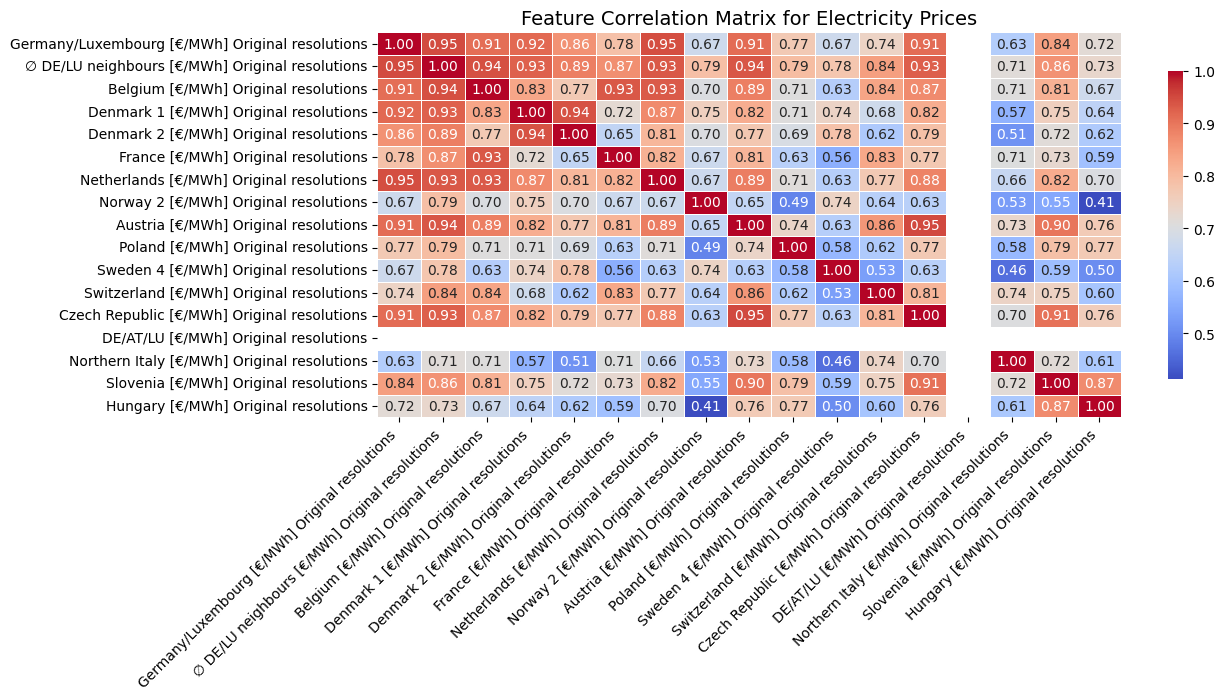

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\electricity_price_correlation_matrix.png


In [4]:
### --- Top features correlated with electricity prices --- ###

# Convert time column to datetime
df_dayahead["Start date"] = pd.to_datetime(df_dayahead["Start date"])

# Drop non-numeric columns (e.g., date/time columns)
df_numeric = df_dayahead.select_dtypes(include=["number"])

# Choose target electricity price column
target_column = "Germany/Luxembourg [€/MWh] Original resolutions"

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Get correlation values with electricity prices
price_correlations = corr_matrix[target_column].drop(target_column).abs().sort_values(ascending=False)

# Print top correlated features
print("Top features correlated with electricity prices:")
print(price_correlations.head(10))  

# Plot heatmap with refinements
plt.figure(figsize=(12, 5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Matrix for Electricity Prices", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(os.path.join(VISUALS_DIR, "electricity_price_correlation_matrix.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'electricity_price_correlation_matrix.png')}")


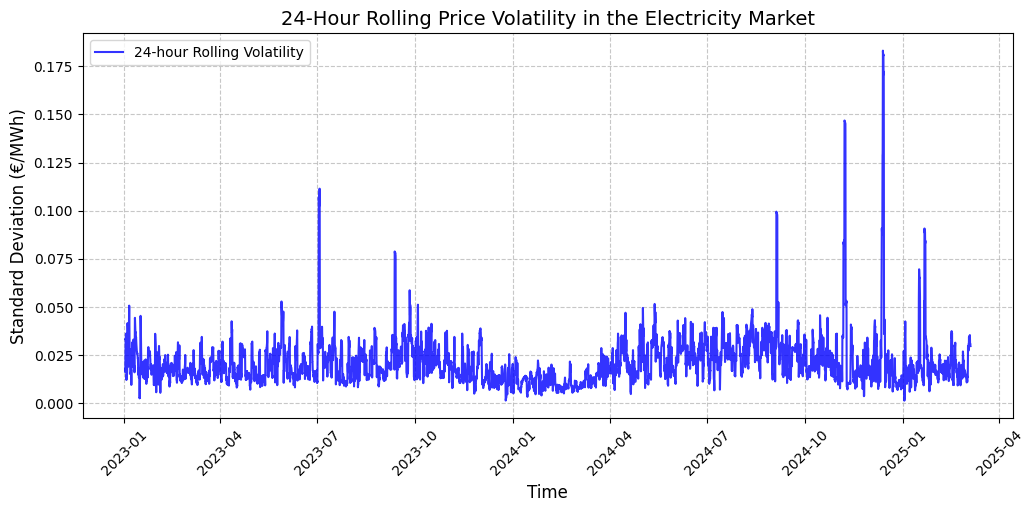

Visual saved: electricity_price_volatility_trend.png


In [52]:
### --- Electricity price volatility trend --- ###

# Convert time column to datetime
df_dayahead["Start date"] = pd.to_datetime(df_dayahead["Start date"])

# Compute rolling standard deviation (volatility)
df_dayahead["Price Volatility"] = df_dayahead["Germany/Luxembourg [€/MWh] Original resolutions"].rolling(window=24).std()

# Plot volatility
plt.figure(figsize=(12, 5))
plt.plot(df_dayahead["Start date"], df_dayahead["Price Volatility"], label="24-hour Rolling Volatility", color="blue", linewidth=1.5, alpha=0.8)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Standard Deviation (€/MWh)", fontsize=12)
plt.title("24-Hour Rolling Price Volatility in the Electricity Market", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.savefig(os.path.join(VISUALS_DIR, "electricity_price_volatility_trend.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("Visual saved: electricity_price_volatility_trend.png")


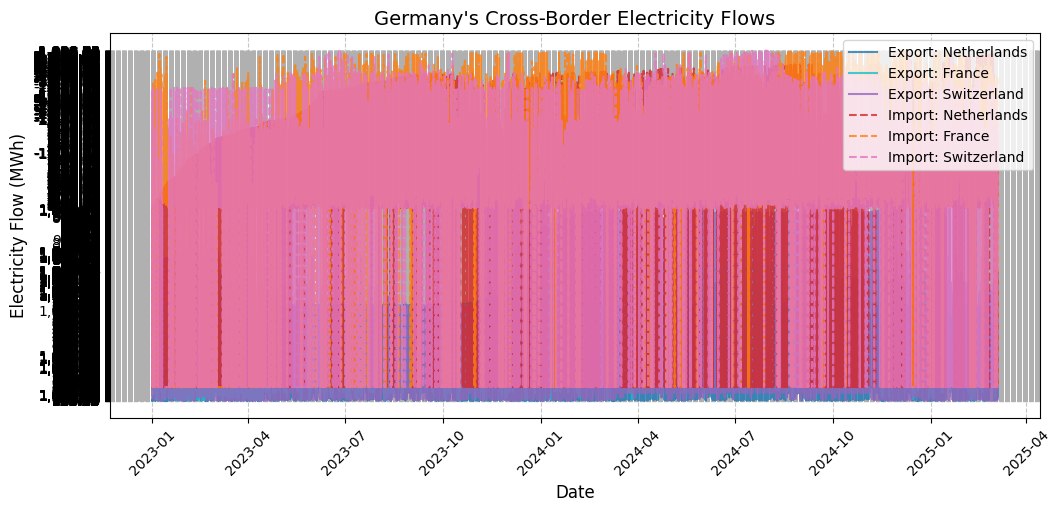

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\cross_border_flows_Germany.png


In [53]:
### --- Germany cross border flows --- ###

# Convert time column to datetime
df_cross_border["Start date"] = pd.to_datetime(df_cross_border["Start date"])

# Define selected columns for Germany's cross-border flows
exports = ["Netherlands (export) [MWh] Original resolutions", 
           "France (export) [MWh] Original resolutions", 
           "Switzerland (export) [MWh] Original resolutions"]

imports = ["Netherlands (import) [MWh] Original resolutions", 
           "France (import) [MWh] Original resolutions", 
           "Switzerland (import) [MWh] Original resolutions"]

# Check for missing columns
missing_cols = [col for col in exports + imports if col not in df_cross_border.columns]
if missing_cols:
    raise KeyError(f"Columns not found in the dataset: {missing_cols}")

# Filter relevant data
df_selected = df_cross_border[["Start date"] + exports + imports]

# Plot cross-border flows
plt.figure(figsize=(12, 5))

# Color scheme: exports (cool tones), imports (warm tones)
export_colors = ["tab:blue", "tab:cyan", "tab:purple"]
import_colors = ["tab:red", "tab:orange", "tab:pink"]

# Plot exports
for col, color in zip(exports, export_colors):
    plt.plot(df_selected["Start date"], df_selected[col], label=f"Export: {col.split()[0]}", color=color, linewidth=1.5, alpha=0.8)

# Plot imports
for col, color in zip(imports, import_colors):
    plt.plot(df_selected["Start date"], df_selected[col], label=f"Import: {col.split()[0]}", color=color, linestyle="dashed", linewidth=1.5, alpha=0.8)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Electricity Flow (MWh)", fontsize=12)
plt.title("Germany's Cross-Border Electricity Flows", fontsize=14)
plt.legend(fontsize=10, loc="upper right")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Save and display
filename = "cross_border_flows_Germany.png"
plt.savefig(os.path.join(VISUALS_DIR, filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, filename)}")


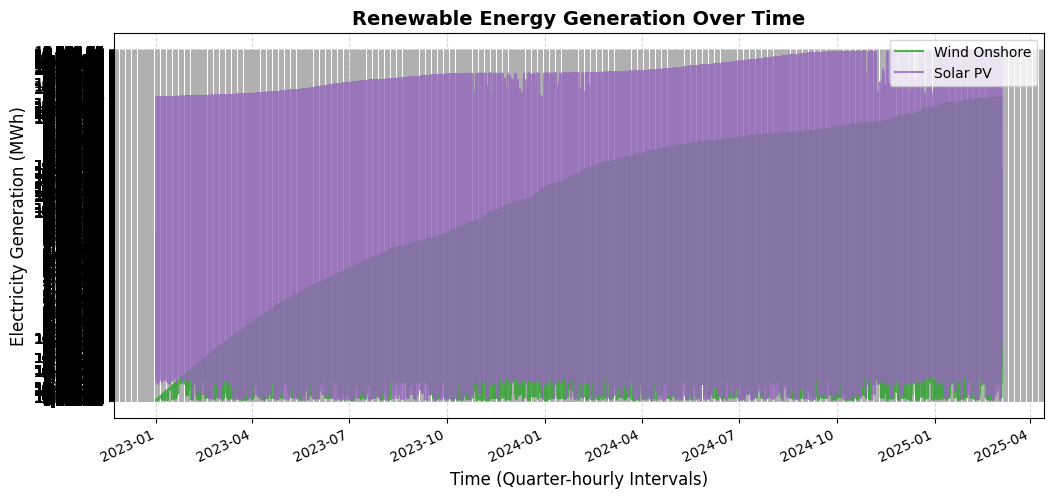

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\renewable_energy_generation_trend.png


In [54]:
### --- Plot Renewable Generation Trends --- ###

# Convert time column to datetime
df_generation["Start date"] = pd.to_datetime(df_generation["Start date"])

# --- Plot Renewable Generation Trends ---
plt.figure(figsize=(12, 5))

plt.plot(
    df_generation["Start date"], 
    df_generation["Wind onshore [MWh] Original resolutions"], 
    label="Wind Onshore", color="tab:green", linewidth=1.5, alpha=0.8
)

plt.plot(
    df_generation["Start date"], 
    df_generation["Photovoltaics [MWh] Original resolutions"], 
    label="Solar PV", color="tab:purple", linewidth=1.5, alpha=0.8
)

plt.xlabel("Time (Quarter-hourly Intervals)", fontsize=12)
plt.ylabel("Electricity Generation (MWh)", fontsize=12)
plt.title("Renewable Energy Generation Over Time", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=25, ha="right", fontsize=10)

# Save plot
plot_filename = "renewable_energy_generation_trend.png"
plt.savefig(os.path.join(VISUALS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, plot_filename)}")


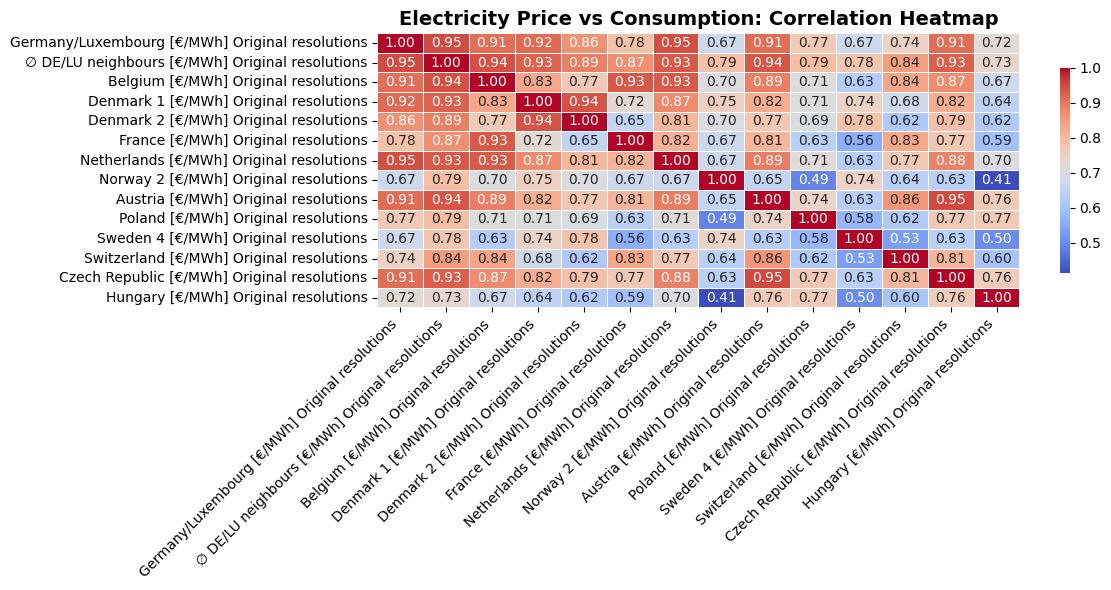

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\electricity_price_consumption_correlation.png


In [ ]:
### --- Electricity Price vs Consumption: Correlation Heatmap --- ###

# Convert time columns to datetime
df_price["Start date"] = pd.to_datetime(df_price["Start date"])
df_consumption["Start date"] = pd.to_datetime(df_consumption["Start date"])

# Merge datasets on "Start date"
df_merged = df_price.merge(df_consumption, on="Start date", how="inner")

# Drop non-numeric columns
df_numeric = df_merged.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# --- Plot Heatmap ---
plt.figure(figsize=(12, 5))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
    linewidths=0.5, cbar_kws={"shrink": 0.75}, annot_kws={"size": 10}
)

plt.title("Electricity Price vs Consumption: Correlation Heatmap", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save plot
heatmap_filename = "electricity_price_consumption_correlation.png"
plt.savefig(os.path.join(VISUALS_DIR, heatmap_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, heatmap_filename)}")

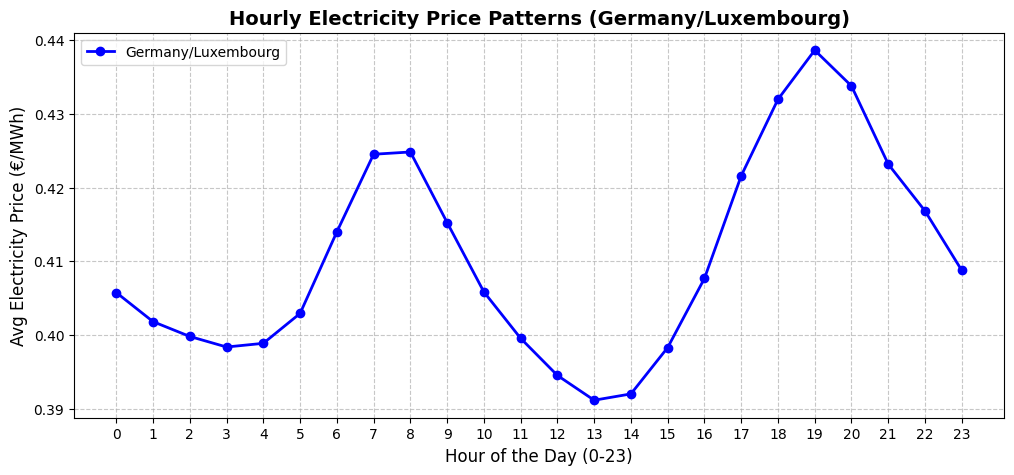

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\hourly_electricity_price_trends.png


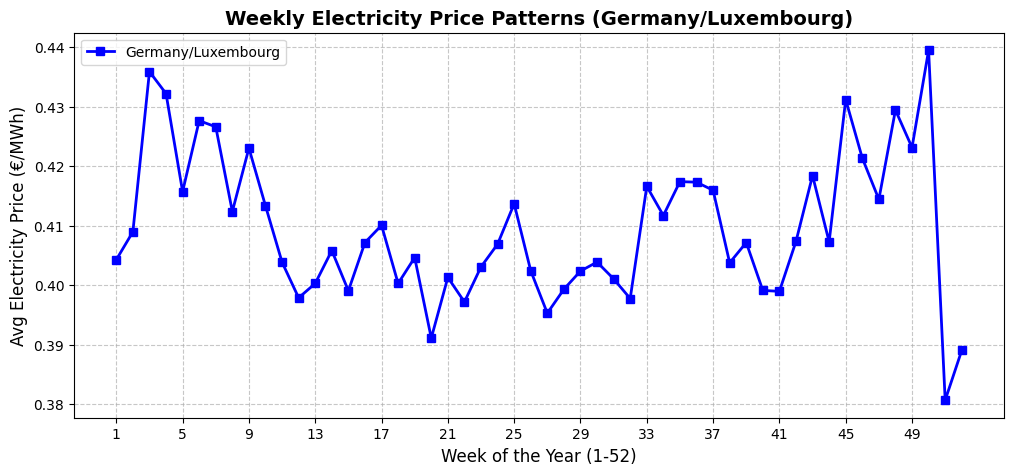

Visual saved: c:\Users\Elite\Documents\ocean\PowerCast The Electricity Price Forecasting Challenge\PowerCast_v2\jupyter-notebooks\..\visuals\weekly_electricity_price_trends.png


In [56]:
### --- Hourly and Weekly Electricity Price Patterns (Germany/Luxembourg) --- ###

# Convert time column to datetime
df_dayahead["Start date"] = pd.to_datetime(df_dayahead["Start date"])

# Extract time components
df_dayahead["Hour"] = df_dayahead["Start date"].dt.hour
df_dayahead["Week"] = df_dayahead["Start date"].dt.isocalendar().week.astype(int)

# Ensure the target column is numeric
price_col = "Germany/Luxembourg [€/MWh] Original resolutions"
df_dayahead[price_col] = pd.to_numeric(df_dayahead[price_col], errors="coerce")

# Drop NaN values
df = df_dayahead.dropna(subset=[price_col])

# Compute hourly and weekly averages
hourly_prices = df.groupby("Hour")[price_col].mean()
weekly_prices = df.groupby("Week")[price_col].mean().sort_index()

# --- Plot Hourly Trends ---
plt.figure(figsize=(12, 5))
plt.plot(hourly_prices.index, hourly_prices, label="Germany/Luxembourg", color="blue", marker="o", markersize=6, linewidth=2)

plt.xlabel("Hour of the Day (0-23)", fontsize=12)
plt.ylabel("Avg Electricity Price (€/MWh)", fontsize=12)
plt.title("Hourly Electricity Price Patterns (Germany/Luxembourg)", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(0, 24))
plt.savefig(os.path.join(VISUALS_DIR, "hourly_electricity_price_trends.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'hourly_electricity_price_trends.png')}")

# --- Plot Weekly Trends ---
plt.figure(figsize=(12, 5))
plt.plot(weekly_prices.index, weekly_prices, label="Germany/Luxembourg", color="blue", marker="s", markersize=6, linewidth=2)

plt.xlabel("Week of the Year (1-52)", fontsize=12)
plt.ylabel("Avg Electricity Price (€/MWh)", fontsize=12)
plt.title("Weekly Electricity Price Patterns (Germany/Luxembourg)", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(1, 53, 4))  # Show every 4th week for better readability
plt.savefig(os.path.join(VISUALS_DIR, "weekly_electricity_price_trends.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Visual saved: {os.path.join(VISUALS_DIR, 'weekly_electricity_price_trends.png')}")